# Data Cleaning

In [1]:
#import the library
import pandas as pd

In [2]:
#read the dataset
df=pd.read_csv(r'E:\Desktop\Datasets\UnSupervised Learning\data_sample_model.csv')

In [3]:
#head values
df.head()

,msisdn,category,usage(kb),daily_spent_time(sec),weekly_spent_time(sec),daily_frequency,monthly_frequency,age,age_category,risk_weight,risk
0,780221345,German Youth Protection,70000,3014,43014,50,1445,12,16-Dec,4,NaN
1,781111345,education,700,647,1552,10,250,16,16-Dec,0,NaN
2,781111345,Drugs,500,491,1178,23,575,18,17-19,3,NaN
3,781111346,Adult's sites,6709,1270,4270,22,664,18,17-19,4,NaN
4,781111347,kids,6324,1238,4238,22,649,5,7-Apr,0,NaN


In [4]:
df.columns

Index(['msisdn', 'category', 'usage(kb)', 'daily_spent_time(sec)',
       'weekly_spent_time(sec)', 'daily_frequency', 'monthly_frequency', 'age',
       'age_category', 'risk_weight', 'risk'],
      dtype='object')

In [5]:
df.dtypes

msisdn                      int64
category                   object
usage(kb)                   int64
daily_spent_time(sec)       int64
weekly_spent_time(sec)      int64
daily_frequency             int64
monthly_frequency           int64
age                         int64
age_category               object
risk_weight                 int64
risk                      float64
dtype: object

In [6]:
df.shape #shape of the dataframe

(100, 11)

In [7]:
#select the requried columns
df1=df[['category', 'usage(kb)', 'daily_spent_time(sec)','weekly_spent_time(sec)', 'daily_frequency', 'monthly_frequency', 'age','risk_weight']]

In [8]:
df1.head()

,category,usage(kb),daily_spent_time(sec),weekly_spent_time(sec),daily_frequency,monthly_frequency,age,risk_weight
0,German Youth Protection,70000,3014,43014,50,1445,12,4
1,education,700,647,1552,10,250,16,0
2,Drugs,500,491,1178,23,575,18,3
3,Adult's sites,6709,1270,4270,22,664,18,4
4,kids,6324,1238,4238,22,649,5,0


In [9]:
df1.isnull().sum() #checking for null values

category                  0
usage(kb)                 0
daily_spent_time(sec)     0
weekly_spent_time(sec)    0
daily_frequency           0
monthly_frequency         0
age                       0
risk_weight               0
dtype: int64

In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
usage(kb),100.0,31951.08,102222.863477,30.0,1969.00,12215.0,28472.75,900000.0
daily_spent_time(sec),100.0,1627.82,904.751524,30.0,857.00,1627.5,2398.75,3170.0
weekly_spent_time(sec),100.0,19002.73,17189.921948,90.0,2056.25,19534.0,42398.75,43170.0
daily_frequency,100.0,27.83,14.478863,2.0,17.00,28.0,40.00,52.0
monthly_frequency,100.0,853.06,491.310345,50.0,483.25,834.5,1255.50,1782.0
age,100.0,13.27,4.576742,4.0,10.00,14.0,18.00,19.0
risk_weight,100.0,2.27,1.376975,0.0,1.00,2.0,4.00,4.0


In [11]:
df1['category'].value_counts()

Adult's sites               20
Social networks             11
Academic Fraud               9
kids                         7
Games                        7
Gambling                     6
Drugs                        6
News and media               6
education                    6
German Youth Protection      5
Virus Propagation            4
Religious                    4
Forums                       3
Dating                       2
Weapon                       2
drugs                        1
Humor                        1
Name: category, dtype: int64

# Data Encoding

In [12]:
import category_encoders as ce #import the library for encoding categorical variables into numeric 

In [13]:
#create an object of the OneHotEncoder
OHE = ce.OneHotEncoder(cols=['category'])# fit and transform to get the encoded data
df2=OHE.fit_transform(df1['category'])

In [14]:
#after transforming
df3=pd.concat([df1, df2], axis=1)
df3.head(20)

,category,usage(kb),daily_spent_time(sec),weekly_spent_time(sec),daily_frequency,monthly_frequency,age,risk_weight,category_1,category_2,...,category_8,category_9,category_10,category_11,category_12,category_13,category_14,category_15,category_16,category_17
0,German Youth Protection,70000,3014,43014,50,1445,12,4,1,0,...,0,0,0,0,0,0,0,0,0,0
1,education,700,647,1552,10,250,16,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Drugs,500,491,1178,23,575,18,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Adult's sites,6709,1270,4270,22,664,18,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,kids,6324,1238,4238,22,649,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Adult's sites,67803,2983,42983,49,1431,16,4,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Drugs,800,709,1701,13,331,19,3,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Weapon,80,490,1470,3,75,7,2,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Adult's sites,79000,3045,43045,50,1460,13,4,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Adult's sites,70,300,900,5,125,19,4,0,0,...,0,0,0,0,0,0,0,0,0,0


# Standardize the Input Variables

In [15]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler from Scikit learn

In [16]:
scaler=StandardScaler()

In [17]:
df3.columns

Index(['category', 'usage(kb)', 'daily_spent_time(sec)',
       'weekly_spent_time(sec)', 'daily_frequency', 'monthly_frequency', 'age',
       'risk_weight', 'category_1', 'category_2', 'category_3', 'category_4',
       'category_5', 'category_6', 'category_7', 'category_8', 'category_9',
       'category_10', 'category_11', 'category_12', 'category_13',
       'category_14', 'category_15', 'category_16', 'category_17'],
      dtype='object')

In [18]:
scaled_features=scaler.fit_transform(df3[['usage(kb)', 'daily_spent_time(sec)', 'weekly_spent_time(sec)',
       'daily_frequency', 'monthly_frequency', 'age', 'risk_weight',
       'category_1', 'category_2', 'category_3', 'category_4', 'category_5',
       'category_6', 'category_7', 'category_8', 'category_9', 'category_10',
       'category_11', 'category_12', 'category_13', 'category_14',
       'category_15', 'category_16', 'category_17']])

In [19]:
#after scaling...........
columns=['usage(kb)', 'daily_spent_time(sec)', 'weekly_spent_time(sec)',
       'daily_frequency', 'monthly_frequency', 'age', 'risk_weight',
       'category_1', 'category_2', 'category_3', 'category_4', 'category_5',
       'category_6', 'category_7', 'category_8', 'category_9', 'category_10',
       'category_11', 'category_12', 'category_13', 'category_14',
       'category_15', 'category_16', 'category_17']
df4=pd.DataFrame(scaled_features,columns=columns)
df4.head()
df5=df4.copy()
df6=df4.copy()

# K Means Clustering

In [20]:
from sklearn.cluster import KMeans

In [21]:
#with 5 clusters
kmeans = KMeans(n_clusters=19)

In [22]:
k_fit=kmeans.fit(df4)
#from sklearn.metrics import silhouette_score
#print(silhouette_score(df4,k_fit))


In [23]:
kmeans.cluster_centers_

array([[-2.51758201e-01, -6.08441582e-01, -6.76496954e-01,
        -6.44478731e-01, -6.26642566e-01,  5.99499239e-01,
         1.19635298e+00, -2.29415734e-01, -2.52645576e-01,
        -2.52645576e-01,  1.77272727e+00, -2.74351631e-01,
        -1.42857143e-01, -3.14485451e-01,  5.06493506e-01,
        -3.51561525e-01, -2.04124145e-01, -2.52645576e-01,
        -2.74351631e-01, -1.00503782e-01, -1.00503782e-01,
        -2.52645576e-01, -2.04124145e-01, -1.75863115e-01],
       [-1.12970152e-01,  1.76031748e-02,  1.82987288e-01,
         1.04352589e-01,  4.76085642e-02,  3.79902448e-01,
        -1.65684603e+00, -2.29415734e-01,  3.95811403e+00,
        -2.52645576e-01, -5.00000000e-01, -2.74351631e-01,
        -1.42857143e-01, -3.14485451e-01, -1.42857143e-01,
        -3.51561525e-01, -2.04124145e-01, -2.52645576e-01,
        -2.74351631e-01, -1.00503782e-01, -1.00503782e-01,
        -2.52645576e-01, -2.04124145e-01, -1.75863115e-01],
       [-1.32447007e-01, -1.03849104e-01, -2.87693137e

In [24]:
# Predicting the Clusters
predictions = k_fit.labels_
df4['Clusters'] = predictions
df4.head()

,usage(kb),daily_spent_time(sec),weekly_spent_time(sec),daily_frequency,monthly_frequency,age,risk_weight,category_1,category_2,category_3,...,category_9,category_10,category_11,category_12,category_13,category_14,category_15,category_16,category_17,Clusters
0,0.374091,1.539830,1.403859,1.538911,1.210889,-0.278888,1.262706,4.358899,-0.252646,-0.252646,...,-0.351562,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,10
1,-0.307255,-1.089538,-1.020286,-1.237654,-1.233636,0.599499,-1.656846,-0.229416,3.958114,-0.252646,...,-0.351562,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,1
2,-0.309222,-1.262830,-1.042153,-0.335270,-0.568807,1.038693,0.532818,-0.229416,-0.252646,3.958114,...,-0.351562,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,2
3,-0.248176,-0.397482,-0.861374,-0.404684,-0.386746,1.038693,1.262706,-0.229416,-0.252646,-0.252646,...,-0.351562,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,0
4,-0.251961,-0.433029,-0.863245,-0.404684,-0.417431,-1.816065,-1.656846,-0.229416,-0.252646,-0.252646,...,-0.351562,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,6


In [25]:
df4.Clusters.value_counts()

4     11
0     11
11    10
3      9
6      7
5      7
15     6
2      6
9      6
1      6
10     5
17     4
18     4
12     3
13     1
14     1
7      1
8      1
16     1
Name: Clusters, dtype: int64

# Interpretation of clusters

<AxesSubplot:xlabel='Clusters', ylabel='usage(kb)'>

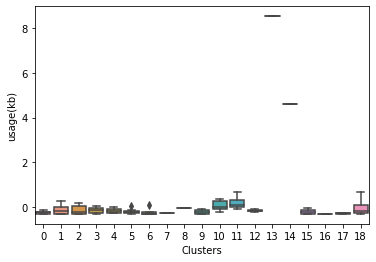

In [26]:
import seaborn as sns
sns.boxplot(x='Clusters', y='usage(kb)', data=df4)

<AxesSubplot:xlabel='Clusters', ylabel='daily_spent_time(sec)'>

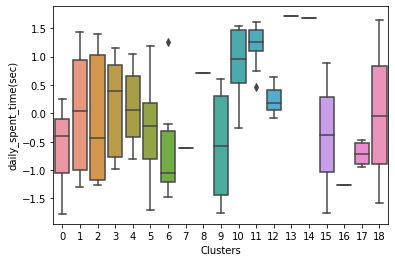

In [27]:
sns.boxplot(x='Clusters', y='daily_spent_time(sec)', data=df4)

<AxesSubplot:xlabel='Clusters', ylabel='weekly_spent_time(sec)'>

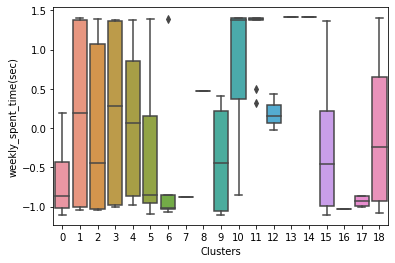

In [28]:
sns.boxplot(x='Clusters', y='weekly_spent_time(sec)', data=df4)

<AxesSubplot:xlabel='Clusters', ylabel='monthly_frequency'>

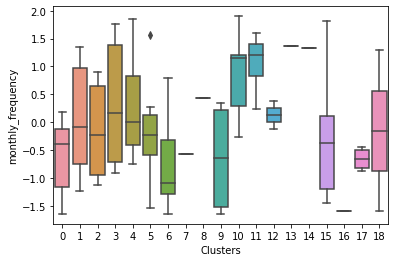

In [29]:
sns.boxplot(x='Clusters', y='monthly_frequency', data=df4)

<AxesSubplot:xlabel='Clusters', ylabel='age'>

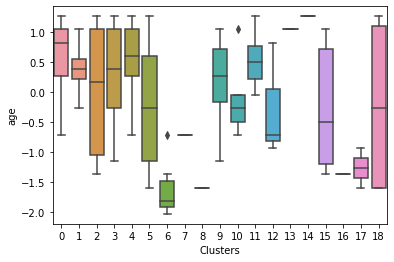

In [30]:
sns.boxplot(x='Clusters', y='age', data=df4)

<AxesSubplot:xlabel='Clusters', ylabel='risk_weight'>

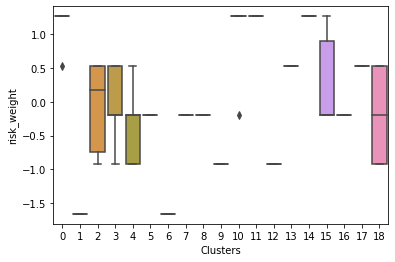

In [31]:
sns.boxplot(x='Clusters', y='risk_weight', data=df4)

In [32]:
join_col = df["category"]
df4 = df4.join(join_col)
df4.head(60)

,usage(kb),daily_spent_time(sec),weekly_spent_time(sec),daily_frequency,monthly_frequency,age,risk_weight,category_1,category_2,category_3,...,category_10,category_11,category_12,category_13,category_14,category_15,category_16,category_17,Clusters,category
0,0.374091,1.539830,1.403859,1.538911,1.210889,-0.278888,1.262706,4.358899,-0.252646,-0.252646,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,10,German Youth Protection
1,-0.307255,-1.089538,-1.020286,-1.237654,-1.233636,0.599499,-1.656846,-0.229416,3.958114,-0.252646,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,1,education
2,-0.309222,-1.262830,-1.042153,-0.335270,-0.568807,1.038693,0.532818,-0.229416,-0.252646,3.958114,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,2,Drugs
3,-0.248176,-0.397482,-0.861374,-0.404684,-0.386746,1.038693,1.262706,-0.229416,-0.252646,-0.252646,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,0,Adult's sites
4,-0.251961,-0.433029,-0.863245,-0.404684,-0.417431,-1.816065,-1.656846,-0.229416,-0.252646,-0.252646,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,6,kids
5,0.352490,1.505394,1.402047,1.469497,1.182250,0.599499,1.262706,-0.229416,-0.252646,-0.252646,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,11,Adult's sites
6,-0.306272,-1.020666,-1.011575,-1.029412,-1.067940,1.258290,0.532818,-0.229416,-0.252646,3.958114,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,2,Drugs
7,-0.313351,-1.263941,-1.025081,-1.723553,-1.591621,-1.376872,-0.197070,-0.229416,-0.252646,-0.252646,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,16,Weapon
8,0.462577,1.574266,1.405672,1.538911,1.241573,-0.059291,1.262706,-0.229416,-0.252646,-0.252646,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,11,Adult's sites
9,-0.313449,-1.475001,-1.058407,-1.584725,-1.489339,1.258290,1.262706,-0.229416,-0.252646,-0.252646,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,0,Adult's sites


In [33]:
df4.head(100)

,usage(kb),daily_spent_time(sec),weekly_spent_time(sec),daily_frequency,monthly_frequency,age,risk_weight,category_1,category_2,category_3,...,category_10,category_11,category_12,category_13,category_14,category_15,category_16,category_17,Clusters,category
0,0.374091,1.539830,1.403859,1.538911,1.210889,-0.278888,1.262706,4.358899,-0.252646,-0.252646,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,10,German Youth Protection
1,-0.307255,-1.089538,-1.020286,-1.237654,-1.233636,0.599499,-1.656846,-0.229416,3.958114,-0.252646,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,1,education
2,-0.309222,-1.262830,-1.042153,-0.335270,-0.568807,1.038693,0.532818,-0.229416,-0.252646,3.958114,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,2,Drugs
3,-0.248176,-0.397482,-0.861374,-0.404684,-0.386746,1.038693,1.262706,-0.229416,-0.252646,-0.252646,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,0,Adult's sites
4,-0.251961,-0.433029,-0.863245,-0.404684,-0.417431,-1.816065,-1.656846,-0.229416,-0.252646,-0.252646,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,6,kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.310205,-1.297266,-1.046538,-0.612927,-0.773370,0.379902,-1.656846,-0.229416,3.958114,-0.252646,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,1,education
96,0.136219,1.332102,1.392926,1.330669,0.844721,-1.157275,-0.926958,-0.229416,-0.252646,3.958114,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,2,Drugs
97,0.146877,1.366538,1.394739,1.330669,0.871314,0.819096,1.262706,-0.229416,-0.252646,-0.252646,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,11,Adult's sites
98,0.157544,1.400974,1.396551,1.400083,0.897908,-1.376872,-0.926958,-0.229416,-0.252646,3.958114,...,-0.204124,-0.252646,-0.274352,-0.100504,-0.100504,-0.252646,-0.204124,-0.175863,2,Drugs


# Elbow method

In [34]:
sse = []
k_rng = range(1,30)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df6)
    sse.append(km.inertia_)

C:\Users\RAVI\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


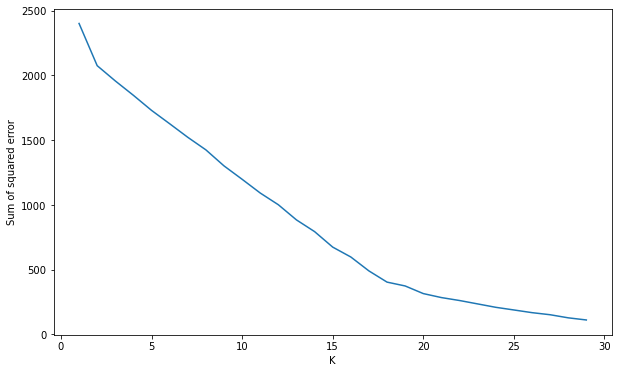

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [36]:
#It seems K should be 19 according to the elbow method

C:\Users\RAVI\anaconda3\envs\tensorflow\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\RAVI\anaconda3\envs\tensorflow\lib\site-packages\yellowbrick\cluster\elbow.py:361: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


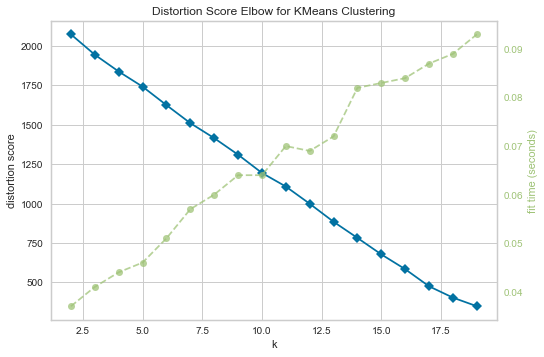

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 20))
visu.fit(df6)
visu.show()

In [38]:
#import libraries
from sklearn.metrics import silhouette_score,calinski_harabasz_score,rand_score,adjusted_rand_score,davies_bouldin_score

## Testing K Means with different K values 

# Hierarchical clustering

In [39]:
import scipy.cluster.hierarchy as sch

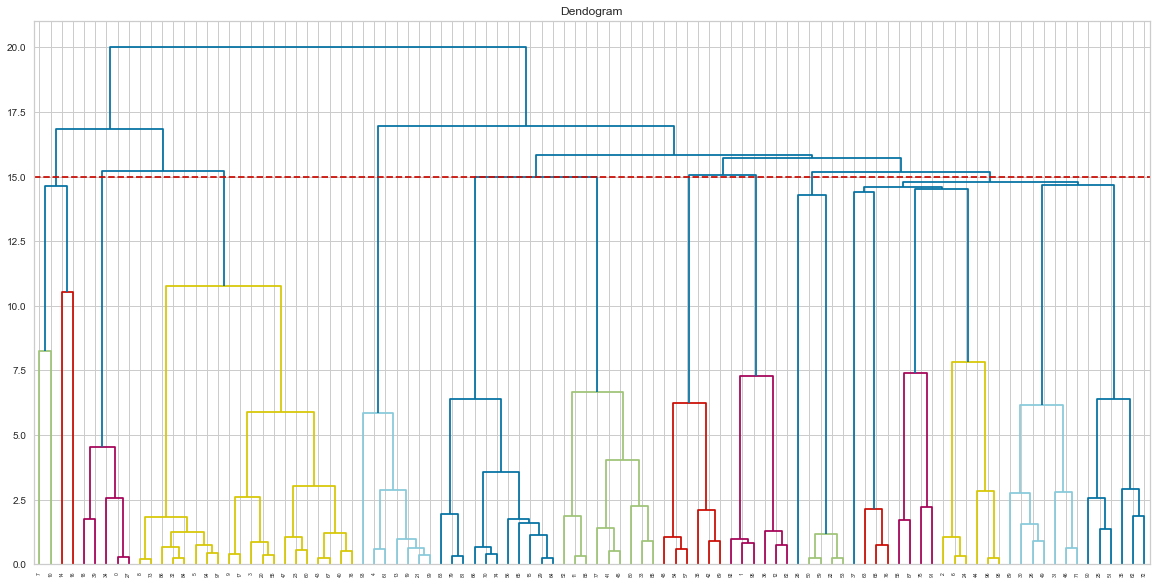

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(df5,method='ward'))
plt.title('Dendogram')
plt.axhline(y=15,color='r',linestyle='--')
plt.show()


In [41]:
#import the library for hierarchical clustering algorithm
from sklearn.cluster import AgglomerativeClustering

In [42]:
cluster=AgglomerativeClustering(n_clusters=19,affinity='euclidean',linkage='ward')
model=cluster.fit_predict(df5)

## Performance Evaluation

In [43]:
print('silhouette_score: ',silhouette_score(df5,model))
print('calinski_harabasz_score: ',calinski_harabasz_score(df5,model))
print('davies_bouldin_score',davies_bouldin_score(df5,model))

silhouette_score:  0.49204364929178773
calinski_harabasz_score:  26.239437734723687
davies_bouldin_score 0.6090602333059246


In [44]:
#testing k value...
print('--------Hierarchical Clustering Performance with Different K values--------')
k=[2,4,10,17,19,28,32,34] #this array got by try different y values and find the number of intersections in Dendrogram
for i in k:
    cluster=AgglomerativeClustering(n_clusters=i,affinity='euclidean',linkage='ward')
    model=cluster.fit_predict(df5)
    print('When K:',i)
    print('silhouette_score: ',silhouette_score(df5,model))
    print('calinski_harabasz_score: ',calinski_harabasz_score(df5,model))
    print('davies_bouldin_score',davies_bouldin_score(df5,model))
    print('------------------------------------------------------')
    
    

--------Hierarchical Clustering Performance with Different K values--------
When K: 2
silhouette_score:  0.106615408169989
calinski_harabasz_score:  8.942411154153936
davies_bouldin_score 2.680075558493959
------------------------------------------------------
When K: 4
silhouette_score:  0.11631067798126649
calinski_harabasz_score:  8.137948501748143
davies_bouldin_score 1.9431150307152776
------------------------------------------------------
When K: 10
silhouette_score:  0.33716038829142647
calinski_harabasz_score:  9.870293199160013
davies_bouldin_score 1.558709630769824
------------------------------------------------------
When K: 17
silhouette_score:  0.5078183855074331
calinski_harabasz_score:  21.591627212640667
davies_bouldin_score 0.7252581466540933
------------------------------------------------------
When K: 19
silhouette_score:  0.49204364929178773
calinski_harabasz_score:  26.239437734723687
davies_bouldin_score 0.6090602333059246
---------------------------------------